In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


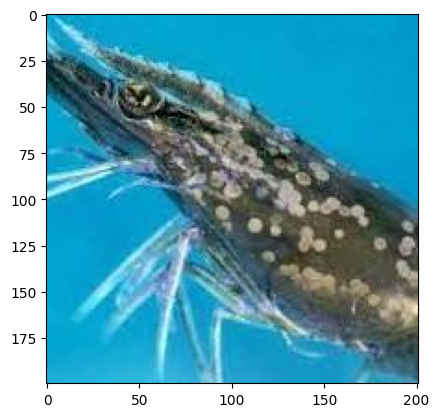

In [3]:
img = image.load_img(r"/content/drive/My Drive/Major_Project/Image_dataset/train/wssv/download-12-_jpg.rf.d1192aacc59feb8219f525aff249249b.jpg")
plt.imshow(img)

In [4]:
cv2.imread(r"/content/drive/My Drive/Major_Project/Image_dataset/train/wssv/download-12-_jpg.rf.d1192aacc59feb8219f525aff249249b.jpg").shape

(200, 201, 3)

In [5]:
train= ImageDataGenerator(rescale=1/255)

In [6]:
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory(r"/content/drive/My Drive/Major_Project/Image_dataset/dataset/Augmented_data/train",target_size=(200,200),batch_size =3, class_mode='binary')

Found 1165 images belonging to 2 classes.


In [8]:
validation_dataset = train.flow_from_directory(r"/content/drive/My Drive/Major_Project/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')

Found 31 images belonging to 2 classes.


In [13]:
dummy_test = train.flow_from_directory(r"/content/drive/My Drive/Major_Project/Image_dataset/dataset/Augmented_data/test_dummy", # Updated path assuming the directory is in your Google Drive
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 161 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
dummy_test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [19]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=15,
                    epochs=20,
                    validation_data = validation_dataset)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4742 - loss: 3.1945 - val_accuracy: 0.8387 - val_loss: 0.6567
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5159 - loss: 0.7080 - val_accuracy: 0.1613 - val_loss: 1.1493
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 960ms/step - accuracy: 0.6438 - loss: 0.6958 - val_accuracy: 0.1613 - val_loss: 1.0244
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 949ms/step - accuracy: 0.5098 - loss: 0.7466 - val_accuracy: 0.1613 - val_loss: 0.7803
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 952ms/step - accuracy: 0.6833 - loss: 0.6003 - val_accuracy: 0.5806 - val_loss: 0.7116
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 830ms/step - accuracy: 0.7878 - loss: 0.5168 - val_accuracy: 0.5161 - val_loss: 0.7028
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 795ms/step - accuracy: 0.6997 - loss: 0.5334 - val_accuracy: 0.1935 - val_loss: 0.9371
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 863ms/step - accuracy: 0.7231 - loss: 0.5861 - val_accuracy: 0.4194 - va

In [20]:
import os, sys, stat

In [22]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

dir_files = os.listdir(r"/content/drive/My Drive/Major_Project/Image_dataset/dataset/Augmented_data/test_dummy/healthy")
dir_path = r"/content/drive/My Drive/Major_Project/Image_dataset/dataset/Augmented_data/test_dummy/healthy"

for file in dir_files:
    # Check if the item is a file before trying to load it
    if os.path.isfile(os.path.join(dir_path, file)):
        img = image.load_img(dir_path+'/'+ file, target_size=(200,200))
        plt.imshow(img)
        plt.show()

        X=image.img_to_array(img)
        X= np.expand_dims(X,axis=0)
        images = np.vstack([X])

        val =  model.predict(images)
        print(val)
        if val==0:
            print("This shrimp is infected with wssv")
        else:
            print("This shrimp is Healthy")

    #print(file)

#for f in healthy_files:
    #img = image.load_img(healthy_path+'/'+ f)
    #plt.imshow(img)
    #plt.show()









Output hidden; open in https://colab.research.google.com to view.

Found 1165 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.5527 - loss: 3.2718 - val_accuracy: 0.4516 - val_loss: 0.6809
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8247 - loss: 0.3696 - val_accuracy: 0.9032 - val_loss: 0.3395
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9351 - loss: 0.1899 - val_accuracy: 0.9032 - val_loss: 0.2225
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9701 - loss: 0.0831 - val_accuracy: 0.9355 - val_loss: 0.2815
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9851 - loss: 0.0444 - val_accuracy: 0.9677 - val_loss: 0.0500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step


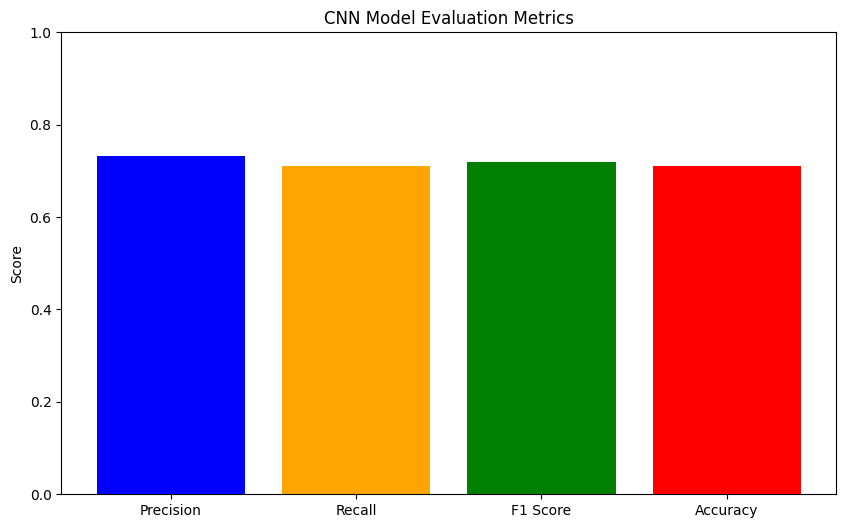

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = datagen.flow_from_directory(
    r"/content/drive/My Drive/Major_Project/Image_dataset/dataset/Augmented_data/train",
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary')

validation_dataset = train.flow_from_directory(
 r"/content/drive/My Drive/Major_Project/Image_dataset/valid",
  target_size=(200,200),
  batch_size =3,
  class_mode='binary')


# Example CNN model (replace with your actual model)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_dataset
)

# Get predictions
y_pred = model.predict(validation_dataset )
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_test_classes = validation_dataset .classes

# Calculate metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Create a bar plot
metrics = [precision, recall, f1, accuracy]
metric_names = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim([0, 1])
plt.title('CNN Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()
